# Clean data for bag of words

In [118]:
import csv
import json
import string
import re
from collections import Counter
from functools import reduce

from IPython.display import clear_output
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from pandas_ml import ConfusionMatrix
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import stop_words
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as acc
from sklearn.ensemble import  RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import RandomUnderSampler

%matplotlib inline

In [121]:
[redacted]

# Over sampling

In [122]:
raw_data = get_raw_data()[-1000:]
X = []
y = []
subjects = []
for i in raw_data:
    X.append(i['body'].lower())
    y.append(i['type'])
    subjects.append(i['subject'])
del raw_data

In [123]:
stopwords = list(map(str, range(0, 90000))) + ['000', '0000', '00', '01', '02', '03', '04', '05', '06', '07', '08', '09']
stopwords += list(stop_words.ENGLISH_STOP_WORDS)
stopwords += ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday', 'mon', 'tue', 'th', 'fri', 'sat', 'sun']
stopwords += ['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december']
stopwords += ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
stopwords += ['3d', 'usa', 'ghanagrio', 'br', 'com', 'dailymail', 'gt', 'hello', 'bradesco', 'uk', 'http', 'https', 'onlinenigeria']                                                           
stopwords = frozenset(stopwords)
 
vectorizer = CountVectorizer(max_features=75, ngram_range=(1,1), analyzer="word", stop_words=stopwords)
X = vectorizer.fit_transform(X)
labels = vectorizer.get_feature_names()
X = X.toarray()

In [124]:
rus = RandomOverSampler(random_state=0)
X_resampled, y_resampled = rus.fit_sample(X, y)

from collections import Counter
print(Counter(y_resampled).items())
    
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=.4, random_state=0)

Counter(y_train)

dict_items([('Malicious Content', 504), ('Malicious Activity', 504), ('Trademark Infringement', 504)])


Counter({'Malicious Activity': 288,
         'Malicious Content': 318,
         'Trademark Infringement': 301})

OrderedDict([('Accuracy', 0.98016528925619839), ('95% CI', (0.96560927485143655, 0.98971014236987787)), ('No Information Rate', 'ToDo'), ('P-Value [Acc > NIR]', 1.9168058382582663e-242), ('Kappa', 0.97018896745423644), ("Mcnemar's Test P-Value", 'ToDo')])
Predicted               Malicious Activity  Malicious Content  \
Actual                                                          
Malicious Activity                     211                  4   
Malicious Content                        6                180   
Trademark Infringement                   0                  1   
__all__                                217                185   

Predicted               Trademark Infringement  __all__  
Actual                                                   
Malicious Activity                           1      216  
Malicious Content                            0      186  
Trademark Infringement                     202      203  
__all__                                    203      605  


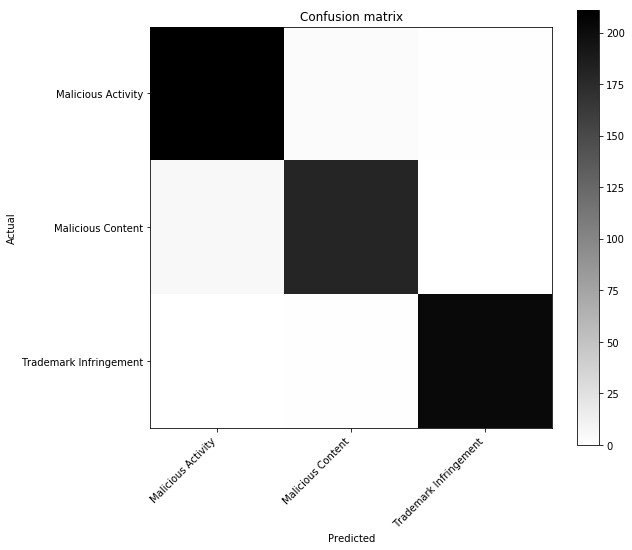

In [125]:
forest = RandomForestClassifier() 
clf = CalibratedClassifierCV(forest)
with sklearn.config_context(assume_finite=True):
    model = clf.fit(X_train, y_train)
    y_pred = model.predict(X_test)
 
print(ConfusionMatrix(y_test, y_pred).stats_overall)
ConfusionMatrix(y_test, y_pred).plot()
print(ConfusionMatrix(y_test, y_pred))


In [126]:
import pickle
with open('model.pickle', 'wb') as f:
    pickle.dump((vectorizer, model), f)

In [130]:
get_raw_data()[-1023]['body']

"\r\n\r\nThis information has been generated out of our comprehensive real time database, tracking worldwide phishing URI's\r\n\r\nIf your review this list of offending site(s), please do this carefully, pay attention for redirects also!\r\nAlso, please consider this particular machines may have a root kit installed !\r\nSo simply deleting some files or dirs or disabling cgi may not really solve the issue !\r\n\r\nAdvice: The appearance of a Virus Site on a server means that someone intruded into the system. The server's owner should disconnect and not return the system into service until an audit is performed to ensure no data was lost, that all OS and internet software is up to date with the latest security fixes, and that any backdoors and other exploits left by the intruders are closed. Logs should be preserved and analyzed and, perhaps, the appropriate law enforcement agencies notified.\r\n\r\nDO NOT JUST DELETE THE FILES. IF YOU DO NOT FIX THE SECURITY PROBLEM, THEY WILL BE BACK!